## IMPORTING LIBRARIES




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

### LOADING DATASETS


In [11]:
client_df = pd.read_csv("C:\\Users\\pc\\Downloads\\client_data.csv")
price_df = pd.read_csv('C:\\Users\\pc\\Downloads\\price_data.csv')

#### Viewing the datasets. 

We have to view the datasets to fully understand the datasets that we have been giving and draw inferences 

In [12]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [13]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Descriptive Statistics

This will provide quantitative measures and summary statistics of the data we have at hand.


In [14]:
client_df.shape

(14606, 26)

In [15]:
price_df.shape


(193002, 8)

In [16]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [17]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Now,we would use the describe function to see into the columns and see if there is any skewed column or if there are any outliers. We do this by  looking to see if the standard deviation is far from the mean

In [19]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [20]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [27]:
df=pd.merge(client_df,price_df,on='id',how='inner')

## Exploratory Analysis


#### First we trying to find the correlation between the variable


In [28]:
columns_to_drop = []

for column in df.columns:
    if df[column].dtype == 'object':
        columns_to_drop.append(column)

df1 = df.drop(columns=columns_to_drop)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [34]:
grouped = client_df.groupby('churn')['channel_sales'].value_counts()
grouped



churn  channel_sales                   
0      foosdfpfkusacimwkcsosbicdxkicaua    5934
       MISSING                             3442
       lmkebamcaaclubfxadlmueccxoimlema    1740
       usilxuppasemubllopkaafesmlibmsdf    1237
       ewpakwlliwisiwduibdlfmalxowmwpci     818
       sddiedcslfslkckwlfkdpoeeailfpeds      11
       epumfxlbckeskwekxbiuasklxalciiuu       3
       fixdbufsefwooaasfcxdxadsiekoceaa       2
1      foosdfpfkusacimwkcsosbicdxkicaua     820
       MISSING                              283
       usilxuppasemubllopkaafesmlibmsdf     138
       lmkebamcaaclubfxadlmueccxoimlema     103
       ewpakwlliwisiwduibdlfmalxowmwpci      75
Name: channel_sales, dtype: int64

<AxesSubplot:title={'center':'channels'}, xlabel='channel_sales'>

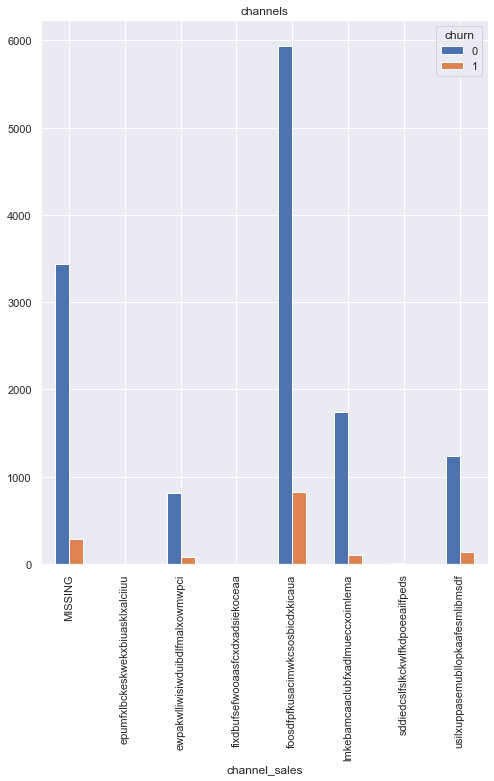

In [37]:
def move_legend(df: pd.DataFrame, column_1: str, column_2: str, plot_kind: str, size: tuple, title: str,
                rotation: int):
    return df.groupby(column_1)[column_2].value_counts().unstack().plot(kind=plot_kind,
                                                                        figsize=size,
                                                                        title=title,
                                                                        rot=rotation)
move_legend(client_df,'channel_sales','churn','bar',(8,10),'channels',90)

In [40]:
def dayofweek(df: pd.DataFrame, column1: str, column2:str):
    df[column1]=df[column2].dt.day_name()
    print(df[column1])
    return df[column1]



In [44]:
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
dayofweek(client_df,'daycontractends','date_end')

0        Wednesday
1          Tuesday
2         Saturday
3        Wednesday
4           Monday
           ...    
14601       Sunday
14602     Saturday
14603       Sunday
14604      Tuesday
14605     Saturday
Name: daycontractends, Length: 14606, dtype: object


0        Wednesday
1          Tuesday
2         Saturday
3        Wednesday
4           Monday
           ...    
14601       Sunday
14602     Saturday
14603       Sunday
14604      Tuesday
14605     Saturday
Name: daycontractends, Length: 14606, dtype: object

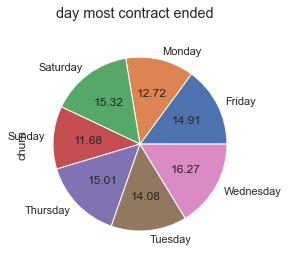

daycontractends
Friday       2178
Monday       1858
Saturday     2238
Sunday       1706
Thursday     2193
Tuesday      2056
Wednesday    2377
Name: churn, dtype: int64

In [45]:
def pie_plotter(df: pd.DataFrame, column_1:str, column_2:str,title:str):
    x=df.groupby(column_1)[column_2].count()
    x.plot.pie(subplots=True,autopct="%.2f",title=title)
    plt.show()
    return x
pie_plotter(client_df,'daycontractends','churn','day most contract ended')

<AxesSubplot:title={'center':'plotting contract end'}, xlabel='daycontractends'>

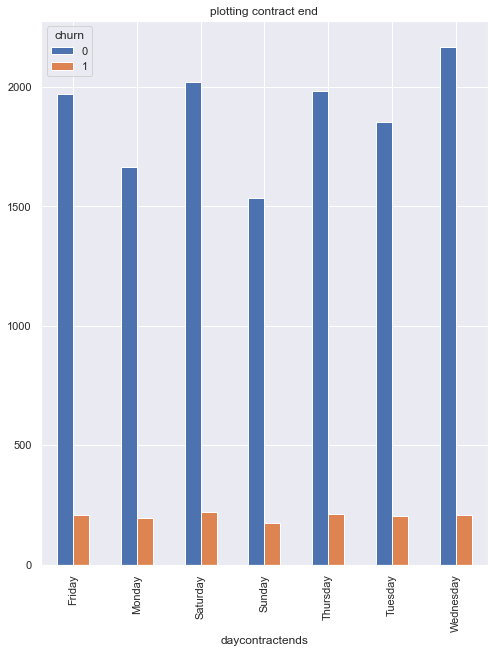

In [46]:
move_legend(client_df,'daycontractends','churn','bar',(8,10),'plotting contract end',90)

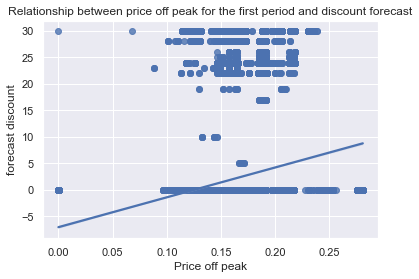

In [53]:
# relationship between variables
sns.regplot(x=df['price_off_peak_var'], y=df['forecast_discount_energy'])

# Set labels and title
plt.xlabel('Price off peak')
plt.ylabel('forecast discount')
plt.title('Relationship between price off peak for the first period and discount forecast')

# Display the plot
plt.show()




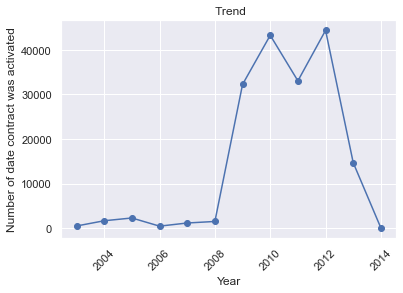

In [54]:
df['year'] = pd.to_datetime(df['date_activ']).dt.year

# Count the frequency of account creations per year
yearly_counts = df['year'].value_counts().sort_index()

# Plot the yearly account creation trend
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of date contract was activated')
plt.title(' Trend')
plt.xticks(rotation=45)
plt.show()



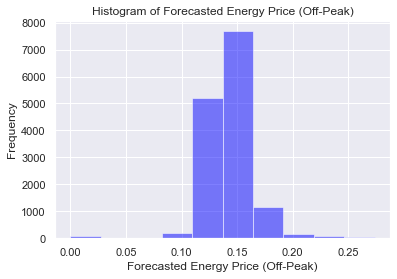

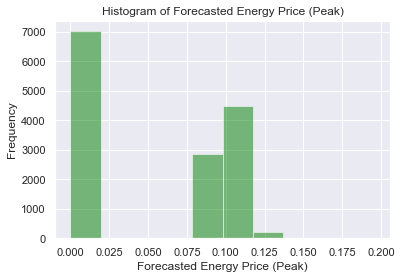

In [55]:
# Plot histogram for forecast_price_energy_off_peak
plt.hist(client_df['forecast_price_energy_off_peak'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Forecasted Energy Price (Off-Peak)')
plt.ylabel('Frequency')
plt.title('Histogram of Forecasted Energy Price (Off-Peak)')
plt.show()

# Plot histogram for forecast_price_energy_peak
plt.hist(client_df['forecast_price_energy_peak'], bins=10, color='green', alpha=0.5)
plt.xlabel('Forecasted Energy Price (Peak)')
plt.ylabel('Frequency')
plt.title('Histogram of Forecasted Energy Price (Peak)')
plt.show()

#### performing the Mann-Whitney U test using the mannwhitneyu() function from scipt.stats

Mann-Whitney U statistic: 9693853.0
p-value: 0.42218906035050685


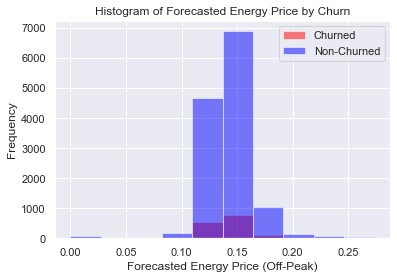

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract the energy prices for churned and non-churned customers
energy_price_churned = client_df.loc[df['churn'] == 1, 'forecast_price_energy_off_peak']
energy_price_non_churned = client_df.loc[df['churn'] == 0, 'forecast_price_energy_off_peak']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(energy_price_churned, energy_price_non_churned)

# Print the test statistic and p-value
print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

# Plot the energy price distributions
plt.hist(energy_price_churned, bins=10, color='red', alpha=0.5, label='Churned')
plt.hist(energy_price_non_churned, bins=10, color='blue', alpha=0.5, label='Non-Churned')
plt.xlabel('Forecasted Energy Price (Off-Peak)')
plt.ylabel('Frequency')
plt.title('Histogram of Forecasted Energy Price by Churn')
plt.legend()
plt.show()


## Task 2
 Verifying the hypothesis of price sensitivity being to some extent correlated with churn
 
 Price sensitivity can be described as the extent to which customers are responsive to changes in price.
 
 So first we will divide the churn customer by total number of all customers

In [58]:
# Assuming you have a DataFrame called 'df' that contains the churned customer information

# Calculate the total number of customers
total_customers = df.shape[0]

# Calculate the number of churned customers
churned_customers = df[df['churn'] == 1].shape[0]

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate: {:.2f}%".format(churn_rate))


Churn Rate: 9.71%


calculating price sensitivity


In [59]:
df['forecasted_price']=df[['forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']].sum(axis=1)
df['forecasted_price']

0         40.819324
1         40.819324
2         40.819324
3         40.819324
4         40.819324
            ...    
175144    45.566918
175145    45.566918
175146    45.566918
175147    45.566918
175148    45.566918
Name: forecasted_price, Length: 175149, dtype: float64

In [60]:
df['actual_price']=df[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].sum(axis=1)
df['actual_price']

0         81.432846
1         81.432846
2         81.432841
3         81.432841
4         81.432841
            ...    
175144    44.519797
175145    44.519797
175146    44.519797
175147    44.519797
175148    44.519797
Name: actual_price, Length: 175149, dtype: float64

In [62]:
# Calculate the price sensitivity metric
df['price_sensitivity'] =  df['actual_price'] - df['forecasted_price'] 

In [64]:


# Define thresholds or quartiles for price sensitivity segments
low_threshold = df['price_sensitivity'].quantile(0.25)
high_threshold = df['price_sensitivity'].quantile(0.75)

# Categorize customers into price sensitivity segments
df['price_segment'] = pd.cut(df['price_sensitivity'], bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Calculate churn rate for each price sensitivity segment
churn_rate = df.groupby('price_segment')['churn'].mean()

# Print churn rate for each segment
print(churn_rate)


price_segment
Low       0.088174
Medium    0.092233
High      0.115756
Name: churn, dtype: float64


## Task 3

The overall churn of the dataset is 9.71%.There is evidence to suggest that price sensitivity is correlated with churn. Customers with higher price sensitivity (in the "High" price sensitivity segment) have a higher churn rate compared to customers in the "Low" and "Medium" segments.This implies that customers who pay more for power may be more likely to churn if they perceive the pricing to be unfavorable or if they find better deals elsewhere.So in my findings, i am of the opinion that our discount should be more directed towards the big institutions that pay more than the residential properties. Additionally , we need to do better as to collecting of data, i noticed a lot of missing information in the Channel_sales column, this is a very big blow as we cannot explicitly decide which channel is having a lot of churned customers linked to it.We will also need more data on our competitiors pricing as to use that as a threshold when convincing our customers.On regards of other sources of data, will really appreciate if we can get the demographic area of clients, to try to find if there is a link between customers churning and area.

Open source data that might be useful: Energy market data,customer satisfaction survey